# Spliting dataset into data train and data test

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# reading file csv that has been labelled, using dropna() in case there's some missing values
df = pd.read_csv("labelled.csv").dropna()
df.head()

,comment,isPositive
0,kemarin samsung and jamlupa merkred flash sale...,0
1,main tan panen voucher tanam voucher minyak go...,0
2,prodak beli oleh shop shoppy produk bekas kwal...,0
3,tolong pesanan ttrfcnc proses penjual tipu kay...,0
4,kenapa update dari googleplay pas bayar listri...,0


In [3]:
# counting values 1 and 0 from isPositive column
df.isPositive.value_counts()

0    9887
1    9197
Name: isPositive, dtype: int64

In [4]:
# splitting (30%) dataset into data test using seed 42
train, test = train_test_split(df, test_size=0.33, random_state=42)

# counting values from isPositive column in variable test
test['isPositive'].value_counts()

0    3249
1    3049
Name: isPositive, dtype: int64

In [5]:
# saving train data and test data into csv format
train.to_csv("train.csv")
test.to_csv("test.csv")

## Word Embedding using Word2Vec

Word2Vec is an algorithm that converts a word into vectors such that it groups similar words together into vector space.

In [6]:
# using gensim library for Word Embedding
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models.callbacks import CallbackAny2Vec
# using matplotlib for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import logging  # using logging to view the log
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [7]:
# tokenizer
def tokenizer(content):
    return content.split()

# tokenizer all sentences by storing them in array form
result_tokenizer = []
for i in train['comment']:
    processing = tokenizer(i)
    result_tokenizer.append(processing)
    
train['comment'] = result_tokenizer

train.head(10)

,comment,isPositive
881,"[pembayaran, lancar, dinonaktifkan, alasan, be...",0
5935,"[tolong, ongkirnya, dikondisikan, mahal, anak,...",0
3328,"[food, pengguna, memakai, vocer, vocer, bacaan...",0
17990,[kereen],1
12400,"[bermasalah, jaringan, susah, terhubung, menca...",1
5023,"[tolong, aturan, diganti, ribet, efisien, kend...",0
13822,"[bintang, kali, belanja, aman, penipu, didalam...",1
133,"[inipakai, expres, standar, tanggal, kemarin, ...",0
12061,"[kecewa, pelayanan, bertanggung, barang, hilan...",1
7770,"[sekarang, ngelag]",0


In [8]:
# refer the value from comment column into sentences variable
sentences = train['comment'].values

sentences

array([list(['pembayaran', 'lancar', 'dinonaktifkan', 'alasan', 'berbeda', 'bulannya', 'laporan', 'cs', 'macro']),
       list(['tolong', 'ongkirnya', 'dikondisikan', 'mahal', 'anak', 'pelosok', 'dibantu', 'harga', 'barang', 'murah', 'dibandingin', 'ongkoskirim', 'sebelah', 'lumayan', 'murah']),
       list(['food', 'pengguna', 'memakai', 'vocer', 'vocer', 'bacaan', 'vocer', 'pesan']),
       ...,
       list(['habis', 'diupdate', 'login', 'ulang', 'giliran', 'login', 'masuk', 'please', 'benerin', 'sistemnya', 'menyusahkan', 'customer']),
       list(['burukpesanan', 'tidaksesuaidengan', 'diposting', 'kecewa', 'shoopi', 'belanja', 'dishoopi', 'udahlah', 'cod', 'ongkirnyapun', 'mahal', 'harga', 'barangenakan', 'belanja', 'dilazada', 'pelayanannya', 'barang', 'sesuai', 'dipesan']),
       list(['membantu', 'barang', 'kedepan', 'pengiriman', 'barang', 'rumah', 'suruh', 'mengambil', 'posko', 'cod', 'pas', 'sibuk', 'tertunda', 'mengambil', 'barang'])],
      dtype=object)

In [9]:
# module phrases: detect phrases longer than one word

Min_Count= 5 # ignores all words with total frequency lower than this
Treshold= 1 # minimum of tershold
phrases = Phrases(sentences, min_count=Min_Count, threshold=Treshold)

# module phraser: train a bigram detector
bigram = Phraser(phrases)

INFO - 08:08:22: collecting all words and their counts
INFO - 08:08:22: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 08:08:22: PROGRESS: at sentence #10000, processed 103170 words and 81452 word types
INFO - 08:08:22: collected 98828 word types from a corpus of 132031 words (unigram + bigrams) and 12786 sentences
INFO - 08:08:22: using 98828 counts as vocab in Phrases<0 vocab, min_count=5, threshold=1, max_vocab_size=40000000>
INFO - 08:08:22: source_vocab length 98828
INFO - 08:08:23: Phraser built with 1067 phrasegrams


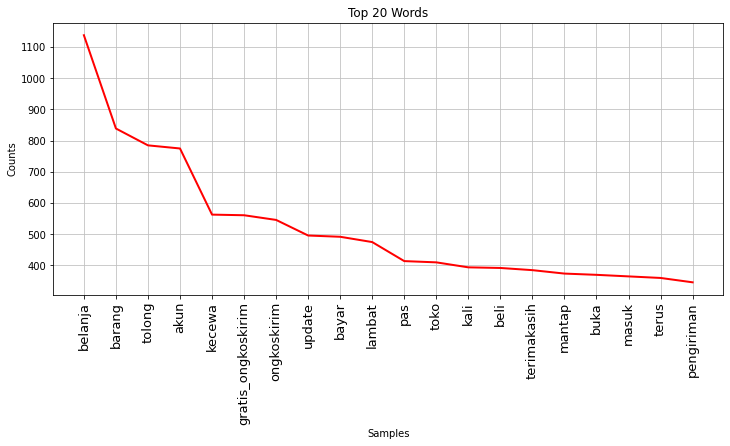

In [10]:
# appending comment to single array using loops
word = []
for comment in bigram[sentences]:
    for words in comment:
        word.append(words)

# config data visual using plotlib
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
plt.title('Top 20 Words')

# FreqDist -> counting words from comment
fd = nltk.FreqDist(word)
fd.plot(20,cumulative=False,color="red")

In [11]:
# making Word2Vec model

# config hyperparams w2v
Dimension_Size= 40 #  size -> dimension size
Window_Size= 35 # window -> maximum distance between the current and predicted word within a sentence
Min_Count= 4 # min_count -> ignores all words with total frequency lower than 4
LearningRate= 0.002 # alpha -> The initial learning rate
# workers: 6 -> using 6 cpu threads
# sg:1 -> Training algorithm for skip-gram
# compute_loss: True -> computes and stores loss value

w2v_model = Word2Vec(bigram[sentences], size = Dimension_Size, window = Window_Size, min_count = Min_Count, workers = 6 ,alpha=LearningRate, compute_loss=True, sg=1)

INFO - 08:08:24: collecting all words and their counts
INFO - 08:08:24: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 08:08:25: PROGRESS: at sentence #10000, processed 91800 words, keeping 16167 word types
INFO - 08:08:25: collected 18693 word types from a corpus of 117408 raw words and 12786 sentences
INFO - 08:08:25: Loading a fresh vocabulary
INFO - 08:08:25: effective_min_count=4 retains 4186 unique words (22% of original 18693, drops 14507)
INFO - 08:08:25: effective_min_count=4 leaves 98476 word corpus (83% of original 117408, drops 18932)
INFO - 08:08:25: deleting the raw counts dictionary of 18693 items
INFO - 08:08:25: sample=0.001 downsamples 47 most-common words
INFO - 08:08:25: downsampling leaves estimated 93924 word corpus (95.4% of prior 98476)
INFO - 08:08:25: estimated required memory for 4186 words and 40 dimensions: 3432520 bytes
INFO - 08:08:25: resetting layer weights
INFO - 08:08:26: training model with 6 workers on 4186 vocabulary and 4

In [12]:
# total_examples (int) – count of sentences
# compute_loss: True -> computes and stores loss value
# epochs: 50 –> number of iterations (epochs) over the corpus
w2v_model.train(bigram[sentences], total_examples=len(bigram[sentences]),compute_loss=True, epochs=50)

WARNING - 08:08:32: Effective 'alpha' higher than previous training cycles
INFO - 08:08:32: training model with 6 workers on 4186 vocabulary and 40 features, using sg=1 hs=0 sample=0.001 negative=5 window=35
INFO - 08:08:33: EPOCH 1 - PROGRESS: at 76.64% examples, 64789 words/s, in_qsize 0, out_qsize 0
INFO - 08:08:33: worker thread finished; awaiting finish of 5 more threads
INFO - 08:08:33: worker thread finished; awaiting finish of 4 more threads
INFO - 08:08:33: worker thread finished; awaiting finish of 3 more threads
INFO - 08:08:33: worker thread finished; awaiting finish of 2 more threads
INFO - 08:08:33: worker thread finished; awaiting finish of 1 more threads
INFO - 08:08:33: worker thread finished; awaiting finish of 0 more threads
INFO - 08:08:33: EPOCH - 1 : training on 117408 raw words (93945 effective words) took 1.3s, 70791 effective words/s
INFO - 08:08:34: EPOCH 2 - PROGRESS: at 76.64% examples, 70821 words/s, in_qsize 0, out_qsize 0
INFO - 08:08:34: worker thread fi

(4695978, 5870400)

In [13]:
# similarity check
# topn -> return topn words and their probabilities
similarity_word = "lambat"
print('10 similar words', similarity_word)
w2v_model.wv.most_similar(similarity_word, topn = 10)

INFO - 08:09:36: precomputing L2-norms of word weight vectors


10 similar words lambat


[('diperbaiki', 0.8720443248748779),
 ('jaringan', 0.8504055142402649),
 ('internet', 0.8424220085144043),
 ('giliran_buka', 0.8255699872970581),
 ('jelek', 0.8203117251396179),
 ('lambat_buka', 0.8154364824295044),
 ('update', 0.8128159642219543),
 ('berat', 0.8094993829727173),
 ('aplikasinya', 0.8059743046760559),
 ('nyaman', 0.8047935366630554)]

In [14]:
# saving w2v model
w2v_model.save("w2vmodel.w2v")
w2v_model.wv.save_word2vec_format('w2v.csv', binary=False) # binary:False -> stored in text format

INFO - 08:09:36: saving Word2Vec object under w2vmodel.w2v, separately None
INFO - 08:09:36: not storing attribute vectors_norm
INFO - 08:09:36: not storing attribute cum_table
INFO - 08:09:36: saved w2vmodel.w2v
INFO - 08:09:36: storing 4186x40 projection weights into w2v.csv


## Gate Recurrent Unit (GRU)
GRU is a simplified version of the LSTM (Long Short-Term Memory) recurrent neural network model. GRU uses only one state vector and two gate vectors, reset gate and update gate.


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import keras
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, GRU, Dropout
import matplotlib
import matplotlib.pyplot as plt

In [16]:
# read train and test from csv file
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [17]:
# refer values from comment column into variable
X_train = train['comment'].values
X_test  = test['comment'].values

# refer values from isPositive column into variable
y_train = train['isPositive'].values
y_test = test['isPositive'].values

texts = train.comment # refer comment value into variable
tokenizer = Tokenizer(num_words = None) # updating internal vocabulary based on text list
tokenizer.fit_on_texts(texts) # converts each text in the text into a sequence of integer or integer numbers
sequences = tokenizer.texts_to_sequences(train.comment) # sequences_train

In [18]:
# give an index to each word
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 17639 unique tokens.


In [19]:
# show word_index
word_index

{'belanja': 1,
 'barang': 2,
 'ongkoskirim': 3,
 'tolong': 4,
 'akun': 5,
 'gratis': 6,
 'bayar': 7,
 'beli': 8,
 'kasih': 9,
 'update': 10,
 'kecewa': 11,
 'pas': 12,
 'masuk': 13,
 'lambat': 14,
 'saldo': 15,
 'pengiriman': 16,
 'bintang': 17,
 'login': 18,
 'voucher': 19,
 'toko': 20,
 'sesuai': 21,
 'shopeepay': 22,
 'buka': 23,
 'pesanan': 24,
 'kali': 25,
 'mohon': 26,
 'pay': 27,
 'hp': 28,
 'harga': 29,
 'susah': 30,
 'cepat': 31,
 'terimakasih': 32,
 'terus': 33,
 'mahal': 34,
 'log': 35,
 'ongkirnya': 36,
 'membantu': 37,
 'kirim': 38,
 'iklan': 39,
 'cod': 40,
 'produk': 41,
 'pembayaran': 42,
 'online': 43,
 'penjual': 44,
 'min': 45,
 'mantap': 46,
 'semoga': 47,
 'dapat': 48,
 'maaf': 49,
 'karena': 50,
 'mudah': 51,
 'orang': 52,
 'murah': 53,
 'aplikasinya': 54,
 'out': 55,
 'juga': 56,
 'uang': 57,
 'perbaiki': 58,
 'kenapa': 59,
 'paket': 60,
 'spaylater': 61,
 'sampai': 62,
 'nomor': 63,
 'dari': 64,
 'jasa': 65,
 'menunggu': 66,
 'coba': 67,
 'terima': 68,
 'pesan':

In [20]:
# combine all vectors together and form a Word Embedding Matrix into Neural Network
vocab_size = len(word_index)+1   # one extra line for out of vocabulary words

# initialising the matrix with zeros
embedding_matrix = np.zeros((vocab_size, 40))

for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]  # add vector to matrix

print('Matrix embedding shape:', embedding_matrix.shape)

Matrix embedding shape: (17640, 40)


In [21]:
# function for converting array into enumerated array in train data
def train_to_int(train, word_index, max_len):

    # np.zeros returns an array of zeros with shape[0] as the dimension of the array
    train_int = np.zeros((train.shape[0], max_len)) 
    for i, word in enumerate(train.comment):
            words = list(word.split(" "))
            j = 0
            for word in reversed(words):
                if word in word_index.keys():   # if it's in the vocab
                    train_int[i, max_len-1-j] = word_index[word]
                    j += 1
    return train_int

# function for converting array into enumerated array in test data
def test_to_int(test, word_index, max_len):

    test_int = np.zeros((test.shape[0], max_len)) 
    for i, word in enumerate(test.comment):
        words = list(word.split(" "))
        j = 0
        for word in reversed(words):
            if word in word_index.keys():   # if it's in the vocab
                test_int[i, max_len-1-j] = word_index[word]
                j += 1
    return test_int

In [22]:
# spliting words from comment column into an array
list_words = []
for i in train['comment']:
    li = list(i.split())
    list_words.append(li)

# finding maximum length from list_words
max_len = 0
for list_ in list_words:
    if len(list_)>max_len:
        max_len = len(list_)

train_int = train_to_int(train, word_index, max_len)
test_int  = test_to_int(test, word_index, max_len) 

In [23]:
# import imblearn library to do smote
# smote is balancing an imbalanced dataset
from imblearn.over_sampling import SMOTE

# doing smote by using data train only using seed 42
smt = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smt.fit_resample(train_int, y_train) # Resample the dataset

MAX_SEQUENCE_LENGTH = X_SMOTE.shape[1]
EMBEDDING_DIM = 40

In [24]:
# show MAX_SEQUENCE_LENGTH
MAX_SEQUENCE_LENGTH

89

In [25]:
# prepare the input Embeding Layer to be added to the GRU layer
embedding_layer = Embedding(vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length = MAX_SEQUENCE_LENGTH)

In [26]:
# function for f1 scoring using Keras library
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [27]:
# function for calculating precision, recall, f1_score, confusion matrix, and accuracy
def get_metric(y_test,y_pred):
    y_test, y_pred = y_test.ravel(), y_pred.ravel()
    total = y_test.shape[0]
    true_positive, true_negative, false_positive, false_negative = 0,0,0,0
    for i in range(total):
        if y_test[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            false_negative += 1
        else:
            true_negative += 1
    precision = true_positive/(true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive/(true_positive + false_negative) if (true_positive + false_positive) != 0 else 0
    f1_score = 2*precision*recall/(precision + recall) if (true_positive + false_positive) != 0 else 0

    conf_matrix = np.array([[true_positive, false_positive],[false_negative, true_negative]])
    accuracy = (true_positive + true_negative)/ total
    return precision, recall, f1_score, accuracy, conf_matrix

In [28]:
# its time for train the model using GRU
kfold=KFold(n_splits= 10, random_state=None, shuffle=True)
fold_var = 1
cvscores = []
history = []

for train, test in kfold.split(train_int, y_train):
    # using sequential model for training
    model = Sequential() 
    model.add(embedding_layer)
    # adding GRU function with 10 iteration
    # dropout is for the first input
    # recurrent_dropout is for input from hidden state
    model.add(GRU(units=10, dropout=0.4, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid')) # logistic sigmoid
    
    # configuring the model using adam algorithm
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics =['accuracy',f1])
    print(model.summary())
    
    # measure of how well a machine learning model generalizes to similar data to that on which it was trained
    history.append(model.fit(train_int[train], y_train[train], batch_size=128, epochs=10, validation_data=(train_int[test], y_train[test]), verbose=2))
    
    # saving model for every iteration
    model.save("model/model"+str(fold_var)+".h5")
    
    score = model.evaluate(train_int[test], y_train[test], verbose = 2)
    
    # print the score for every iteration model
    print("%s: %.2f%% | %s: %.2f%% | %s: %.2f%%" % (model.metrics_names[0], score[0]*100,model.metrics_names[1], score[1]*100, model.metrics_names[2], score[2]*100))
    y_pred = model.predict(test_int)
    y_pred = y_pred.round()
    precision, recall, f1_score, accuracy, conf_matrix = get_metric(y_test, y_pred)
    print('The test results of the model '+str(fold_var))
    print('Accuracy  :', accuracy)
    print('Precision :', precision)
    print('Recall    :', recall)
    print('F1 score  :', f1_score)
    fold_var += 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 89, 40)            705600    
                                                                 
 gru (GRU)                   (None, 10)                1560      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 707,171
Trainable params: 707,171
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
90/90 - 12s - loss: 0.6267 - accuracy: 0.6627 - f1: 0.6141 - val_loss: 0.5615 - val_accuracy: 0.7342 - val_f1: 0.7088 - 12s/epoch - 137ms/step
Epoch 2/10
90/90 - 8s - loss: 0.5314 - accuracy: 0.7396 - f1: 0.7169 - val_loss: 0.5064 - val_accuracy: 0.7717 - val_f1: 0.7463 - 8s/epoch - 94ms/step
Epoc

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  1


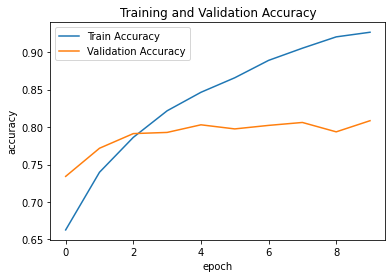

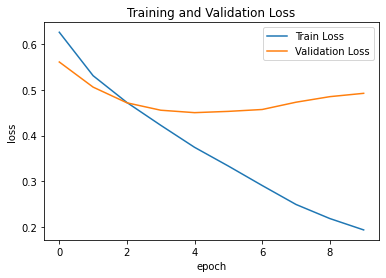

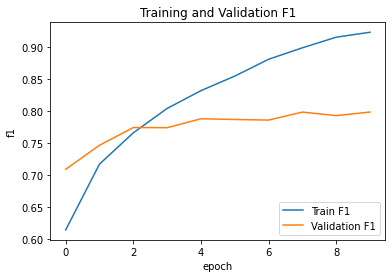

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  2


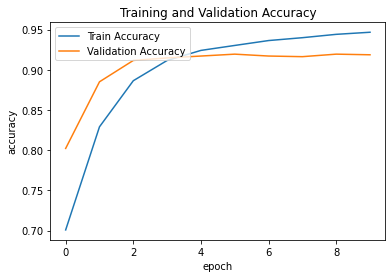

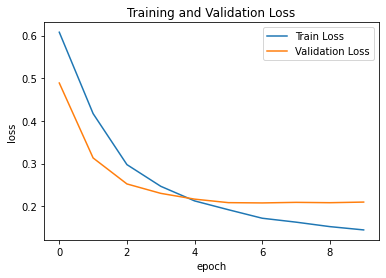

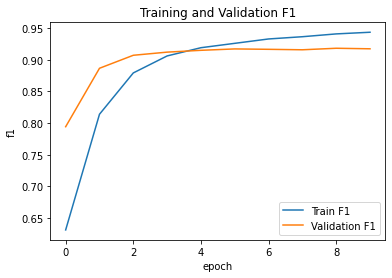

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  3


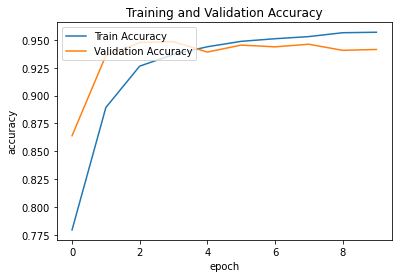

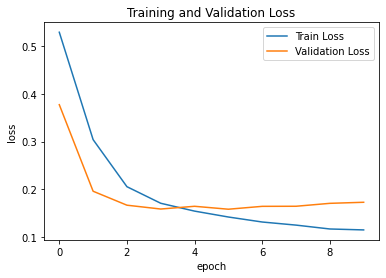

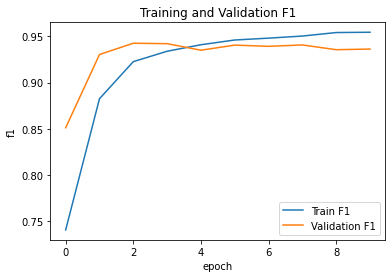

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  4


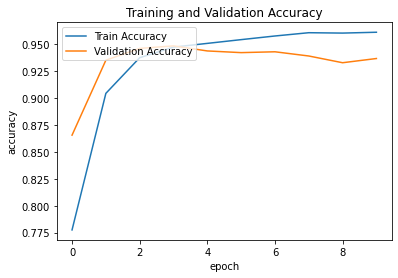

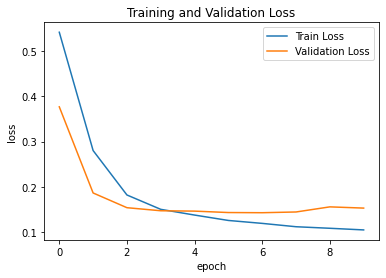

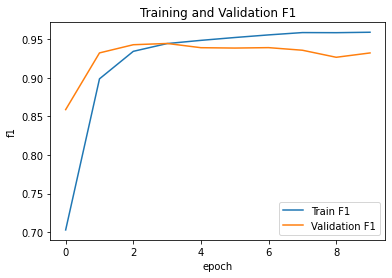

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  5


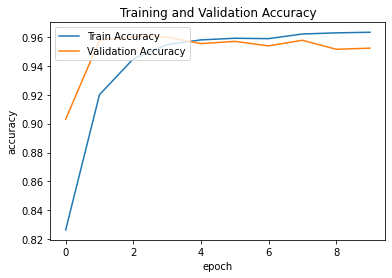

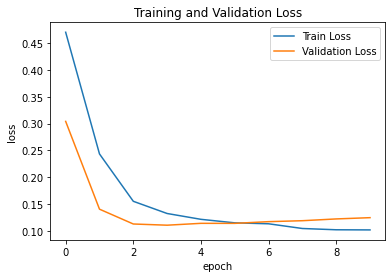

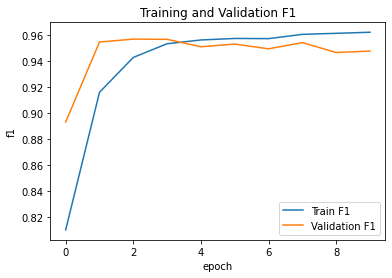

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  6


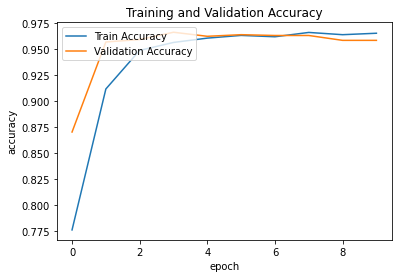

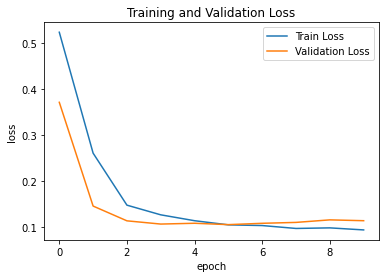

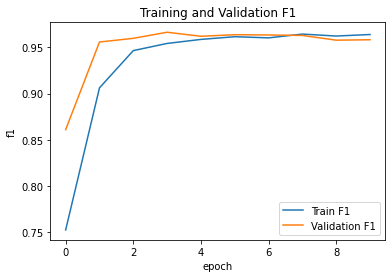

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  7


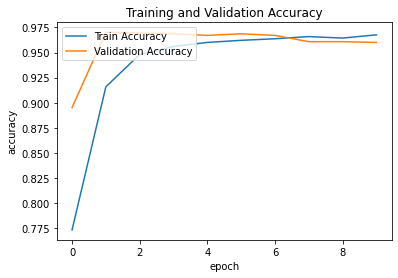

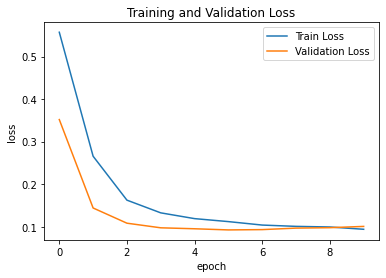

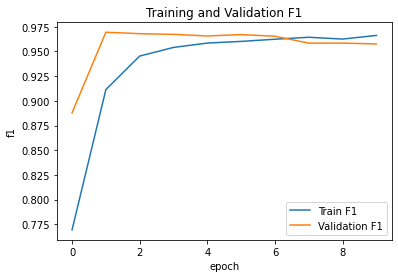

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  8


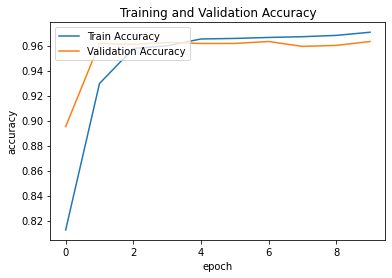

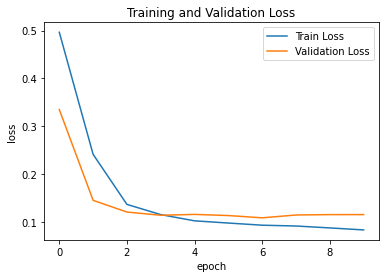

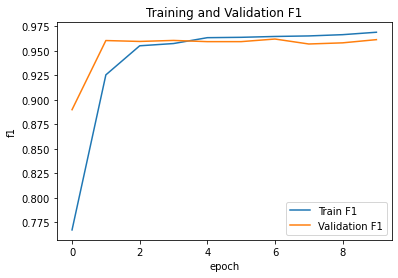

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  9


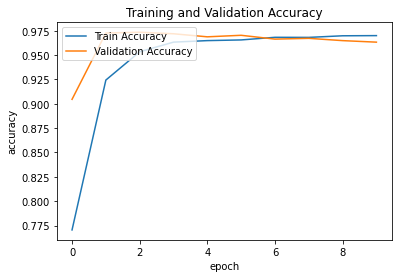

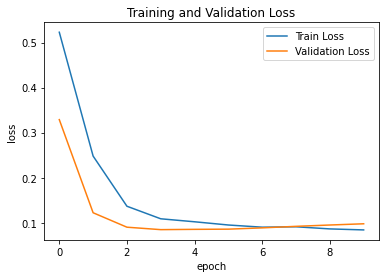

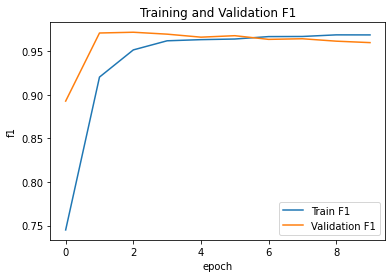

dict_keys(['loss', 'accuracy', 'f1', 'val_loss', 'val_accuracy', 'val_f1'])

Summartize History K-Fold:  10


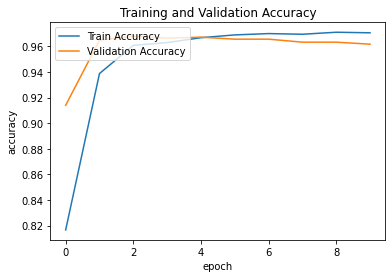

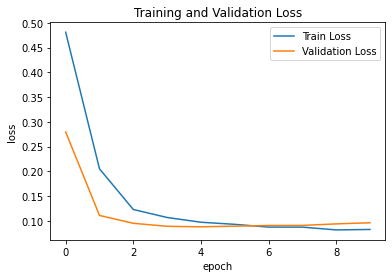

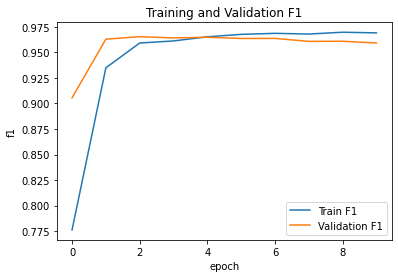

In [29]:
# looping the model for visualization 
i = 0
for i in range(10):
    # Plot Loss Model and Accuracy Model
    print(history[i].history.keys())
    print("\nSummartize History K-Fold: " ,i+1)

    # Accuracy History
    plt.plot(history[i].history['accuracy'])
    plt.plot(history[i].history['val_accuracy']) 
    plt.title('Training and Validation Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
    plt.savefig("History Accuracy KFOLD {}.png".format(i+1))
    plt.show()

    # Loss History
    plt.plot(history[i].history['loss'])
    plt.plot(history[i].history['val_loss'])
    plt.title('Training and Validation Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
    plt.savefig("History Loss KFOLD {}.png".format(i+1))
    plt.show()
    
    # f1score History
    plt.plot(history[i].history['f1'])
    plt.plot(history[i].history['val_f1']) 
    plt.title('Training and Validation F1')
    plt.ylabel('f1')
    plt.xlabel('epoch')
    plt.legend(['Train F1', 'Validation F1'], loc='lower right')
    plt.savefig("History f1 KFOLD {}.png".format(i+1))
    plt.show()

In [30]:
# save the model
model.save("grumodel.h5")

In [41]:
# using model that has more accuracy and less loss
model = load_model('model/model10.h5', custom_objects={'f1':f1})

In [42]:
# call the confusion matrix into dataset
y_pred = model.predict(test_int)
y_pred = y_pred.round()

matrix = confusion_matrix(y_test,y_pred.round())
matrix

array([[2580,  669],
       [ 762, 2287]])

In [43]:
# calculation report from sklearn library
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      3249
           1       0.77      0.75      0.76      3049

    accuracy                           0.77      6298
   macro avg       0.77      0.77      0.77      6298
weighted avg       0.77      0.77      0.77      6298



In [44]:
# calculation report from get_metric function
precision, recall, f1_score, accuracy, conf_matrix = get_metric(y_test, y_pred)
print('Accuracy  :', accuracy,'\n')
print('Precision :', precision)
print('Recall    :', recall)
print('F1 score  :', f1_score)

Accuracy  : 0.7727850111146396 

Precision : 0.773680649526387
Recall    : 0.7500819940964251
F1 score  : 0.7616985845129061


In [45]:
# function for sentence prediction
def sentimentAnalysis(train):
    word = [train]
    word = tokenizer.texts_to_sequences(word) # another tokenizer
    # maxlen -> words maximum length
    word = pad_sequences(word, maxlen=89, dtype='float', value=0)
    # refer model predict into variable
    # The batch size defines the number of samples that will be propagated through the network.
    sentiment = model.predict(word, batch_size=10, verbose = 2)
    if(sentiment[0] < 0.5):
        return "Negative with "+ "{0:.2f}".format((1 - sentiment[0][0]) * 100)+ "% Confidence."
    else:
        return "Positive with "+"{0:.2f}".format(sentiment[0][0] * 100)+"% Confidence."

In [46]:
# checking model predict
sentimentAnalysis("ongkir gratis memang terbaik")

1/1 - 0s - 21ms/epoch - 21ms/step


'Positive with 99.83% Confidence.'

In [47]:
sentimentAnalysis("kecewa sekali")

1/1 - 0s - 20ms/epoch - 20ms/step


'Negative with 83.07% Confidence.'

In [48]:
sentimentAnalysis("baik saya kecewa")

1/1 - 0s - 20ms/epoch - 20ms/step


'Negative with 85.34% Confidence.'

In [56]:
sentimentAnalysis("benci banget buka fitur shopee")

1/1 - 0s - 29ms/epoch - 29ms/step


'Negative with 94.40% Confidence.'

In [54]:
sentimentAnalysis("belanja di shopee lebih murah")

1/1 - 0s - 33ms/epoch - 33ms/step


'Positive with 96.53% Confidence.'